<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.981 · TFM · Aula 1</p>
<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'informàtica, multimèdia i telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>
<div style="text-align: center; margin-top: 40px;">
    <h1>Aplicación para ayuda a la conducción con deep learning</h1>
</div>

### ARCHIVO 8: Prueba modelo detección semáforos + STOPS

Código que ejecuta en vídeos e imágenes del modelos entrenado para evaluar resultados. 

Código ejecutado en plataforma Visual Studio Code.

In [1]:
# Llibreries

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Modelo
model_det = YOLO("Detect_SIGNS.pt")     # Model detecció semàfors + STOPS


0: 480x640 1 stop sign, 44.4ms
Speed: 6.1ms preprocess, 44.4ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


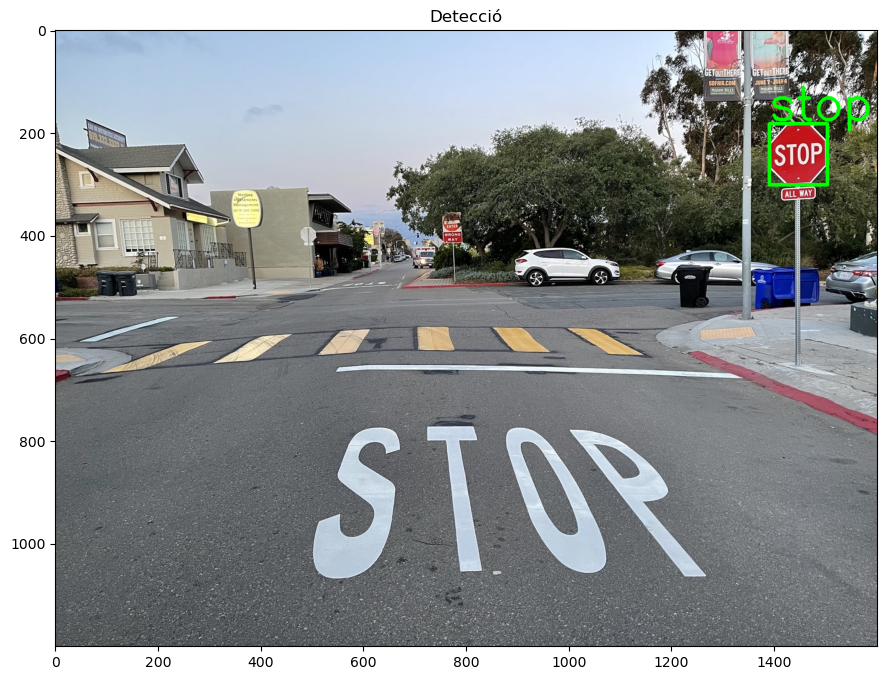

In [5]:
# Imatge a tractar
frame = cv2.imread("Media/stop.jpg")

# Detecció
results_det = model_det(frame)[0]

# Per detecció mostra per pantalla
for box in results_det.boxes:

    cls = int(box.cls[0])
    label = model_det.names[cls]
    conf = box.conf[0]
    
    # Coordenades
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    x1, y1 = max(x1, 0), max(y1, 0)
    x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

    # bbox + text
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
    label_text = f"{label} {conf:.2f}"
    cv2.putText(frame, label_text, (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)

# Correcció BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# 📺 Mostra la imatge
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)
plt.title("Detecció")
plt.show()


0: 480x640 1 traffic light, 1 stop sign, 47.9ms
Speed: 4.7ms preprocess, 47.9ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)


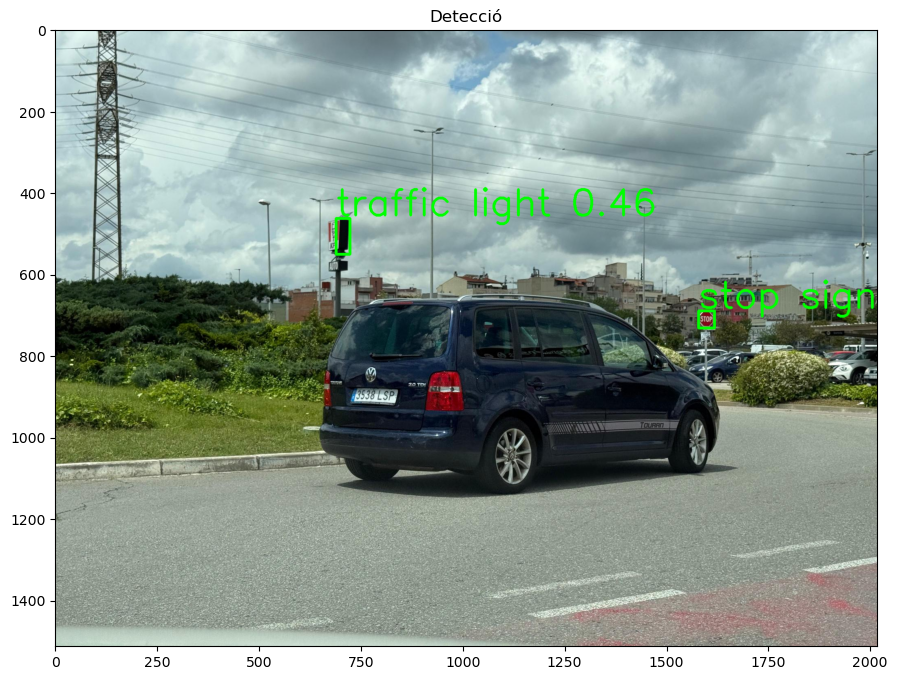

In [6]:
# Imatge a tractar
frame = cv2.imread("Media/foto1.jpg")

# Detecció
results_det = model_det(frame)[0]

# Per detecció mostra per pantalla
for box in results_det.boxes:

    cls = int(box.cls[0])
    label = model_det.names[cls]
    conf = box.conf[0]
    
    # Coordenades
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    x1, y1 = max(x1, 0), max(y1, 0)
    x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

    # bbox + text
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
    label_text = f"{label} {conf:.2f}"
    cv2.putText(frame, label_text, (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)

# Correcció BGR a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# 📺 Mostra la imatge
plt.figure(figsize=(12, 8))
plt.imshow(frame_rgb)
plt.title("Detecció")
plt.show()

In [ ]:
# Video
cap = cv2.VideoCapture("Media/v2.mp4")

# Paràmetres vídeo
out = cv2.VideoWriter("sortida_senyals.mp4",
                      cv2.VideoWriter_fourcc(*'mp4v'),
                      cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Per fotograma
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # DETECCIÓ
    results_det = model_det(frame)[0]
    deteccions = results_det.boxes

    for box in deteccions:
        cls = int(box.cls[0])
        label = model_signs.names[cls]

        # Coordenades
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        x1, y1 = max(x1, 0), max(y1, 0)
        x2, y2 = min(x2, frame.shape[1]), min(y2, frame.shape[0])

        # bbox + text
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Fotograma actualitzat
    out.write(frame)

# Allibera recursos
cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 118.6ms
Speed: 7.9ms preprocess, 118.6ms inference, 94.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.8ms
Speed: 3.2ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.4ms
Speed: 2.9ms preprocess, 17.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 traffic light, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 231.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.4ms
Speed: 2.9ms preprocess, 17.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.4ms
Speed: 2.4ms preprocess, 15.

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
